In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, log_loss
import xgboost as xgb
import matplotlib.pyplot as plt


In [37]:
# X = np.load('./data_set/X_train_drop.npy')
# Y = np.load('./data_set/Y_train_drop.npy')
X = np.load('./data_set/X_train_processed.npy')
Y = np.load('./data_set/Y_train_processed.npy')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [38]:
def binary_cross_entropy_loss(Y, Y_hat):
    """
    计算平均二元交叉熵损失
    Y: 真实目标矩阵，形状为 (n_samples, n_tasks)
    Y_hat: 预测矩阵，形状与 Y 相同
    """
    n_samples = Y.shape[0]
    n_tasks = Y.shape[1]
    
    loss = -np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)) / (n_samples * n_tasks)
    return loss

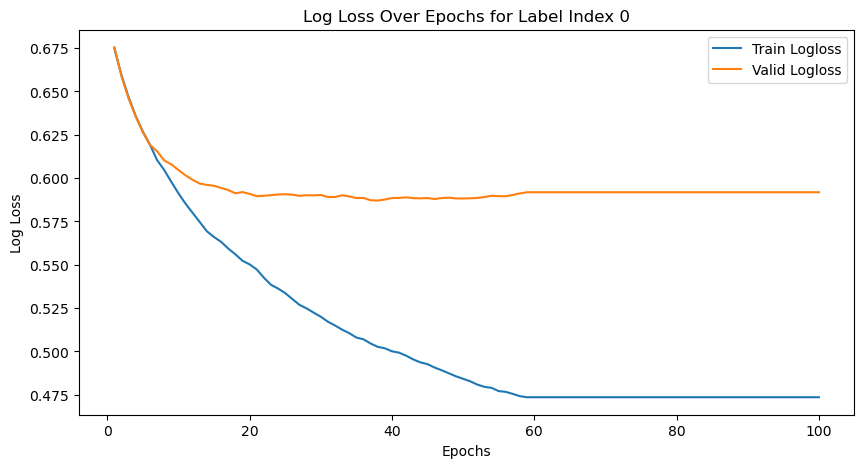

Metrics for Label Index 0:
Accuracy: 0.7391304347826086
Recall: 0.020833333333333332
F1 Score: 0.039999999999999994
Confusion Matrix:
[[135   1]
 [ 47   1]]

--------------------------------------------------



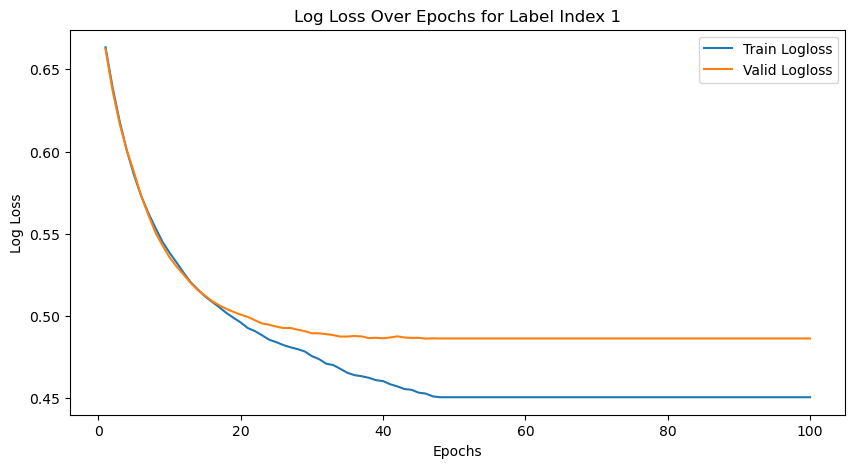

Metrics for Label Index 1:
Accuracy: 0.8097826086956522
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[149   0]
 [ 35   0]]

--------------------------------------------------



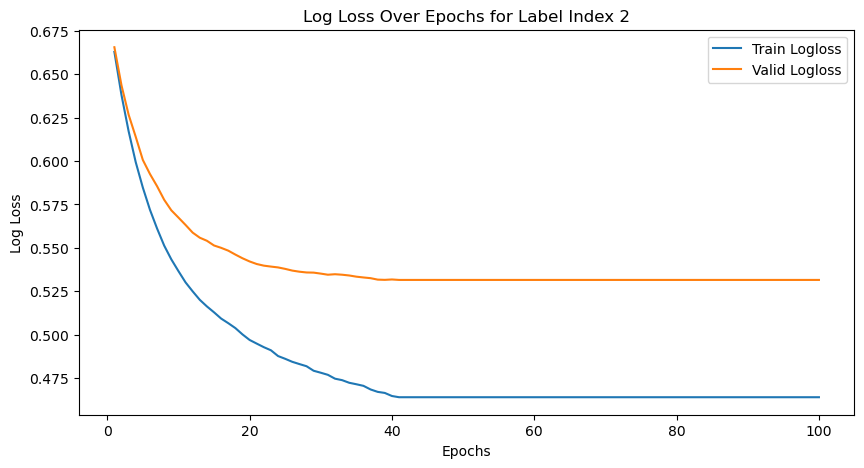

Metrics for Label Index 2:
Accuracy: 0.7608695652173914
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[140   0]
 [ 44   0]]

--------------------------------------------------



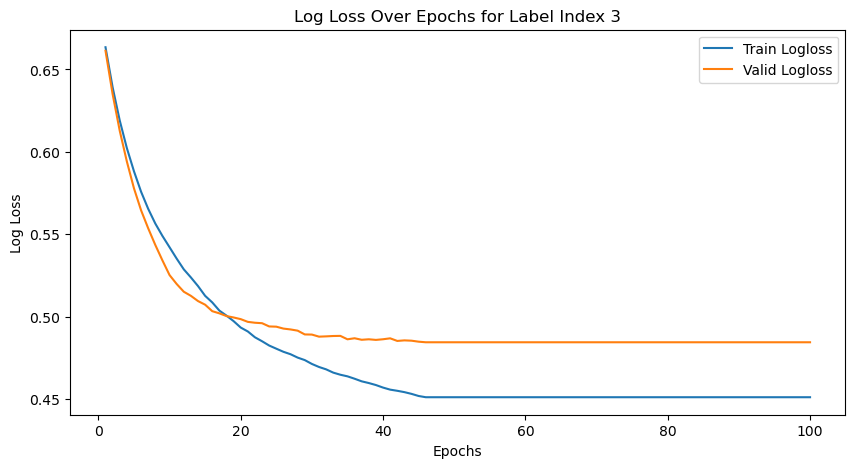

Metrics for Label Index 3:
Accuracy: 0.7228260869565217
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[133   0]
 [ 51   0]]

--------------------------------------------------



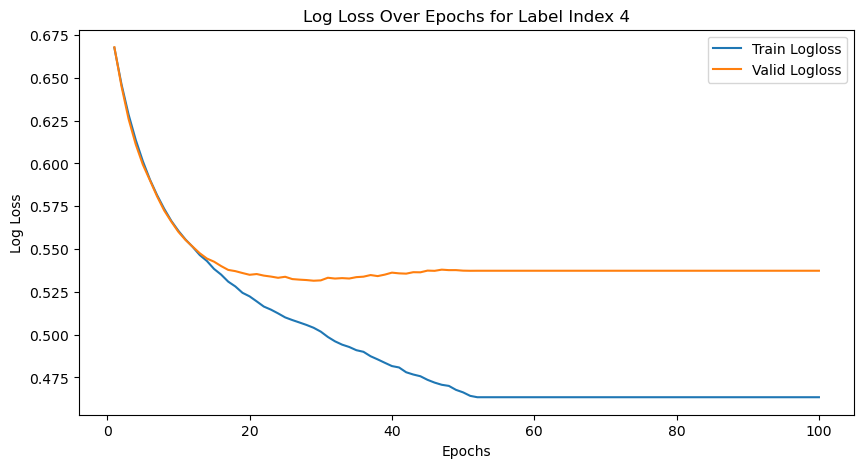

Metrics for Label Index 4:
Accuracy: 0.7554347826086957
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[139   0]
 [ 45   0]]

--------------------------------------------------



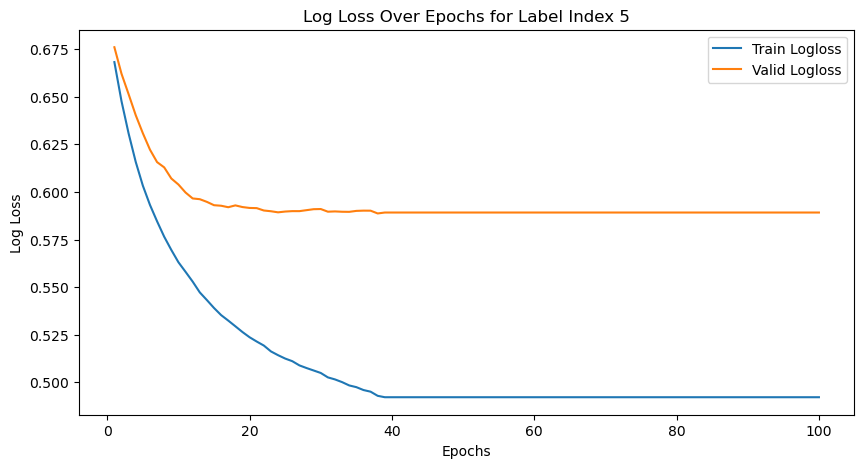

Metrics for Label Index 5:
Accuracy: 0.7010869565217391
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[129   0]
 [ 55   0]]

--------------------------------------------------



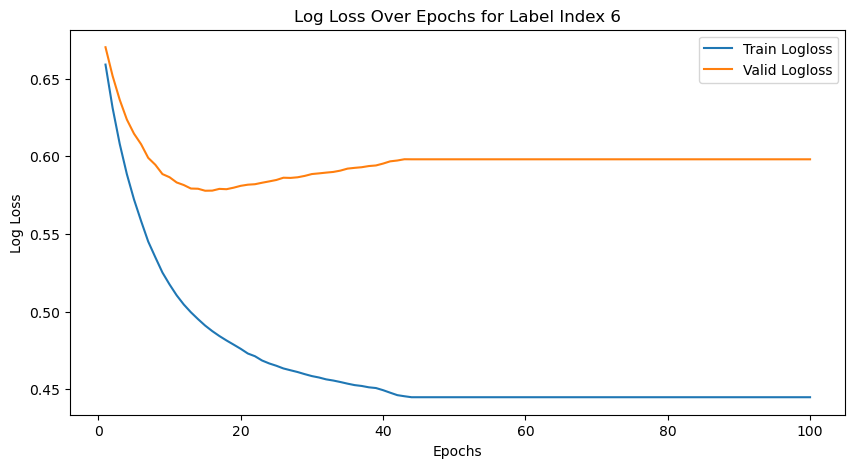

Metrics for Label Index 6:
Accuracy: 0.7717391304347826
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[142   0]
 [ 42   0]]

--------------------------------------------------



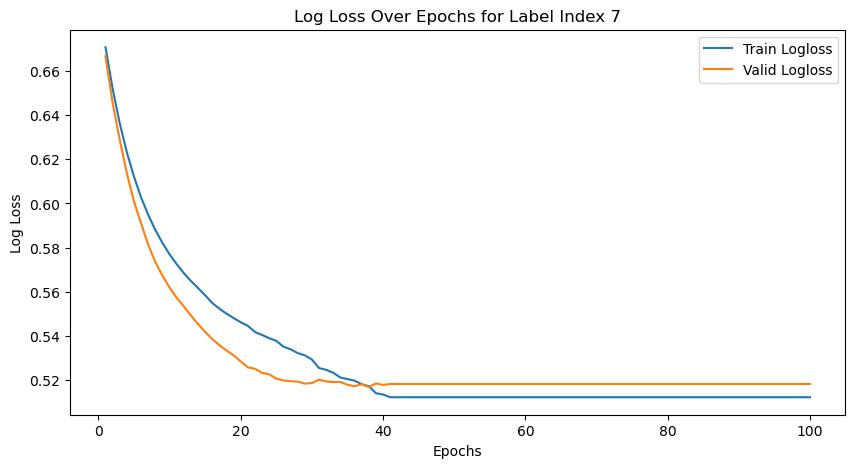

Metrics for Label Index 7:
Accuracy: 0.7717391304347826
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[142   0]
 [ 42   0]]

--------------------------------------------------



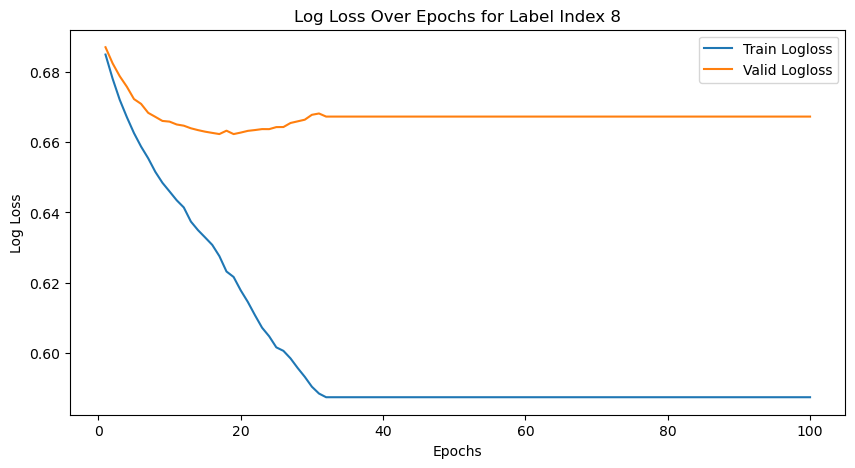

Metrics for Label Index 8:
Accuracy: 0.6358695652173914
Recall: 0.1917808219178082
F1 Score: 0.29473684210526313
Confusion Matrix:
[[103   8]
 [ 59  14]]

--------------------------------------------------



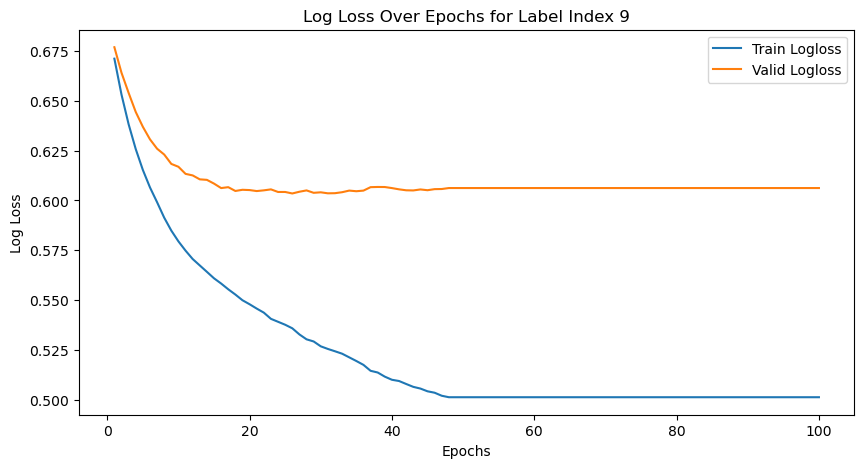

Metrics for Label Index 9:
Accuracy: 0.75
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[138   0]
 [ 46   0]]

--------------------------------------------------



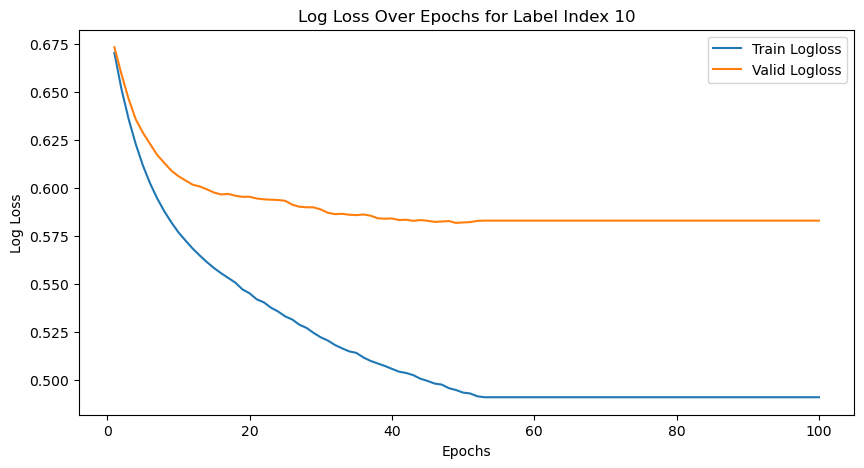

Metrics for Label Index 10:
Accuracy: 0.7880434782608695
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[145   1]
 [ 38   0]]

--------------------------------------------------



In [42]:
# 存储每个标签的评估结果
all_evals = []

for label_index in range(Y_train.shape[1]):
    # 创建训练集和验证集
    X_train_part, X_valid_part, Y_train_part, Y_valid_part = train_test_split(X_train, Y_train[:, label_index], test_size=0.2, random_state=42)
    dtrain_part = xgb.DMatrix(X_train_part, label=Y_train_part)
    dvalid_part = xgb.DMatrix(X_valid_part, label=Y_valid_part)

    # 训练模型并监控评估指标
    evals_result = {}
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'learning_rate': 0.1,
        'max_depth': 4,
        'alpha': 10
    }

    # 设置 verbose_eval 为 False 以避免打印损失信息
    model = xgb.train(params, dtrain_part, num_boost_round=100, evals=[(dtrain_part, 'train'), (dvalid_part, 'valid')],
                      evals_result=evals_result, verbose_eval=False)
    # 绘制损失图
    train_logloss = evals_result['train']['logloss']
    valid_logloss = evals_result['valid']['logloss']
    epochs = range(1, len(train_logloss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_logloss, label='Train Logloss')
    plt.plot(epochs, valid_logloss, label='Valid Logloss')
    plt.title('Log Loss Over Epochs for Label Index ' + str(label_index))
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

    # 预测测试数据
    Y_pred = model.predict(xgb.DMatrix(X_test))
    Y_pred = (Y_pred > 0.5).astype(int)

    # 计算和打印评估指标
    acc = accuracy_score(Y_test[:, label_index], Y_pred)
    recall = recall_score(Y_test[:, label_index], Y_pred, zero_division=0)
    f1 = f1_score(Y_test[:, label_index], Y_pred, zero_division=0)
    cm = confusion_matrix(Y_test[:, label_index], Y_pred)

    all_evals.append({
        'label_index': label_index,
        'accuracy': acc,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    })

    print(f"Metrics for Label Index {label_index}:")
    print(f"Accuracy: {acc}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(cm)
    print("\n" + "-"*50 + "\n")



In [40]:
# # 我们将创建一个字典来存储每个标签的模型
# models = {}
# for i in range(Y_train.shape[1]):  # 对每个标签训练一个模型
#     dtrain = xgb.DMatrix(X_train, label=Y_train[:, i])
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'learning_rate': 0.1,
#         'max_depth': 4,
#         'alpha': 10
#     }
#     models[i] = xgb.train(params, dtrain, num_boost_round=100)

# Y_pred = np.zeros_like(Y_test)
# for i in range(Y_train.shape[1]):
#     dtest = xgb.DMatrix(X_test)
#     Y_pred[:, i] = (models[i].predict(dtest) > 0.5).astype(int)

# # 计算总体指标
# acc = accuracy_score(Y_test.flatten(), Y_pred.flatten())
# recall = recall_score(Y_test.flatten(), Y_pred.flatten(), average='macro')
# f1 = f1_score(Y_test.flatten(), Y_pred.flatten(), average='macro')
# cm = confusion_matrix(Y_test.flatten(), Y_pred.flatten())

# print(f"Accuracy: {acc}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print("Confusion Matrix:")
# print(cm)

# for i in range(Y_train.shape[1]):
#     # 计算每个标签的指标
#     label_acc = accuracy_score(Y_test[:, i], Y_pred[:, i])
#     label_recall = recall_score(Y_test[:, i], Y_pred[:, i], zero_division=0)
#     label_f1 = f1_score(Y_test[:, i], Y_pred[:, i], zero_division=0)

#     print(f"Metrics for Label {i}:")
#     print(f"  Accuracy: {label_acc}")
#     print(f"  Recall: {label_recall}")
#     print(f"  F1 Score: {label_f1}")



In [41]:
# # 定义评估函数
# def evalerror(preds, dtrain):
#     labels = dtrain.get_label()
#     # 预测值是概率，需要确保其在 (0,1) 范围内，以避免 log(0) 错误
#     preds = np.clip(preds, 1e-15, 1-1e-15)
#     return 'binary_cross_entropy', -np.sum(labels * np.log(preds) + (1 - labels) * np.log(1 - preds)) / len(labels)

# # 循环处理每个标签
# all_evals = []
# for label_index in range(Y_train.shape[1]):
#     X_train_part, X_valid_part, Y_train_part, Y_valid_part = train_test_split(X_train, Y_train[:, label_index], test_size=0.1, random_state=42)
#     dtrain_part = xgb.DMatrix(X_train_part, label=Y_train_part)
#     dvalid_part = xgb.DMatrix(X_valid_part, label=Y_valid_part)

#     evals_result = {}
#     params = {
#         'objective': 'binary:logistic',
#         'learning_rate': 0.1,
#         'max_depth': 4,
#         'alpha': 10
#     }

#     # 训练模型
#     model = xgb.train(params, dtrain_part, num_boost_round=100, evals=[(dtrain_part, 'train'), (dvalid_part, 'valid')],
#                       evals_result=evals_result, feval=evalerror, verbose_eval=False)

#     # 绘制损失图
#     train_loss = evals_result['train']['binary_cross_entropy']
#     valid_loss = evals_result['valid']['binary_cross_entropy']
#     epochs = range(1, len(train_loss) + 1)
    
#     plt.figure(figsize=(10, 5))
#     plt.plot(epochs, train_loss, label='Train BCE Loss')
#     plt.plot(epochs, valid_loss, label='Valid BCE Loss')
#     plt.title('Binary Cross Entropy Loss Over Epochs for Label Index ' + str(label_index))
#     plt.xlabel('Epochs')
#     plt.ylabel('Binary Cross Entropy Loss')
#     plt.legend()
#     plt.show()

#     # 使用您的损失函数计算测试集上的损失
#     dtest = xgb.DMatrix(X_test)
#     Y_pred_prob = model.predict(dtest)
#     bce_loss = binary_cross_entropy_loss(Y_test[:, label_index:label_index+1], Y_pred_prob[:, np.newaxis])

#     # 计算其他评估指标
#     Y_pred = (Y_pred_prob > 0.5).astype(int)
#     acc = accuracy_score(Y_test[:, label_index], Y_pred)
#     recall = recall_score(Y_test[:, label_index], Y_pred, zero_division=0)
#     f1 = f1_score(Y_test[:, label_index], Y_pred, zero_division=0)
#     cm = confusion_matrix(Y_test[:, label_index], Y_pred)

#     all_evals.append({
#         'label_index': label_index,
#         'accuracy': acc,
#         'recall': recall,
#         'f1_score': f1,
#         'confusion_matrix': cm,
#         'bce_loss': bce_loss
#     })

#     print(f"Metrics for Label Index {label_index}:")
#     print(f"Accuracy: {acc}")
#     print(f"Recall: {recall}")
#     print(f"F1 Score: {f1}")
#     print("Confusion Matrix:")
#     print(cm)
#     print(f"BCE Loss: {bce_loss}")
#     print("\n" + "-"*50 + "\n")